#### 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
# We are dropping all null value and take 117 non null sample value & fill with sample value)
# Every time we run will pick some 177 non null samples & put based on index
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
# Find the index of missing null value index
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    # matching the index & replacing the value
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [8]:
median=df.Age.median()

In [9]:
median

28.0

In [10]:
impute_nan(df,"Age",median)

In [11]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

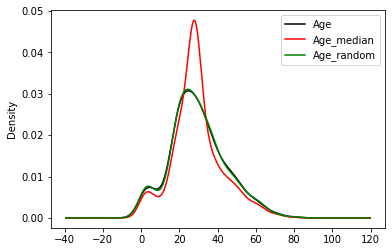

In [13]:
# Plot with three varibale 
# Now blue & green are overlaps (both are same)- so will give good prediction 
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='black')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

##### 3. Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [14]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
# Create the new feature 1 for non null, 0 for null
# This will help model learn more info. But we add more more feature,the performance of the system will decrease.
# later fill with age with median value.
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [16]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [17]:
df.Age.median()

28.0

In [18]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [19]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#### 4. End of Distribution imputation
- https://medium.com/analytics-vidhya/feature-engineering-part-1-end-of-tail-imputation-c5069a41869a

- https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-imputing-missing-values-6c22b49d4060

In [20]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

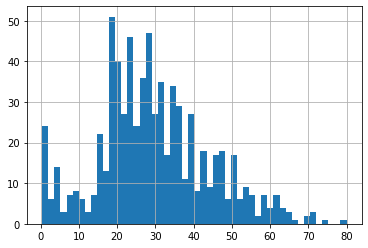

In [21]:
# Create the histogram with 50 bin
df.Age.hist(bins=50)

In [22]:
# Focus on extrem - after mean - add three standard deviation values ( for that multiply 3 * std)
extreme=df.Age.mean()+3*df.Age.std()

C:\Users\Sushil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

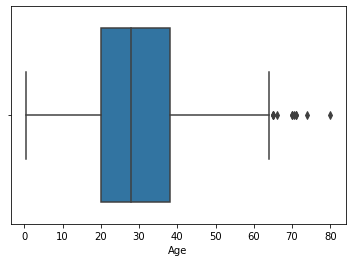

In [23]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [24]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

 Will do two parts - Create new feature & fill with missing value with median.
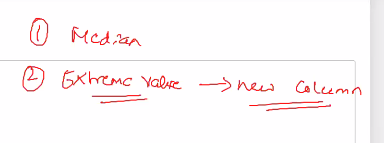

In [25]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [26]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

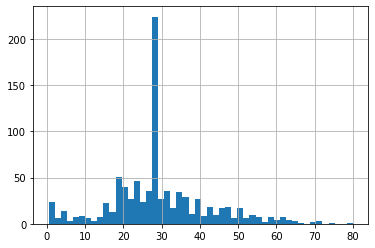

In [27]:
df['Age'].hist(bins=50)

<AxesSubplot:>

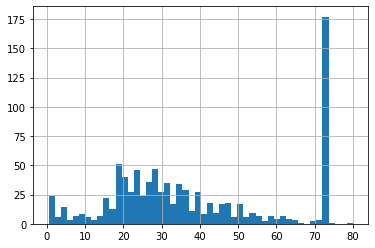

In [28]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Sushil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

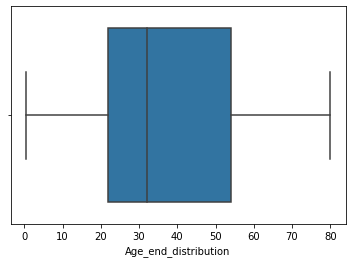

In [29]:
sns.boxplot('Age_end_distribution',data=df)

### Advantages
Easy to implement
Captures the importance of missingess if there is one
### Disadvantages
Distorts the original distribution of the variable
If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
If the number of NA is big, it will mask true outliers in the distribution
If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of feature engineering
